## Importamos las librerias que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from pandas_profiling import ProfileReport
from sklearn import preprocessing

## Importamos el DataFrame de entrenamiento y test

In [3]:
#
df_train = pd.read_csv("Dataset\hospitalizaciones_train.csv")
df_test = pd.read_csv("Dataset\hospitalizaciones_test.csv")

Hacemos un EDA

In [6]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [7]:
df_train.shape

(410000, 15)

In [8]:
df_test.shape

(90000, 14)

Realizamos una exploración de los datos con Pandas Profiling

In [9]:
#df_train.profile_report()

Reviso las columnas para evaluar su contenido

In [10]:
columns_df = df_train.columns
columns_df

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

In [11]:
for i in columns_df:
    print(i)
    print(df_train[i].unique())
    print("")

Available Extra Rooms in Hospital
[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]

Department
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']

Ward_Facility_Code
['D' 'B' 'E' 'F' 'A' 'C']

doctor_name
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']

staff_available
[ 0  2  8  7 10  5  9  3  6  4  1]

patientid
[33070 34808 44577 ... 40881 51342 63598]

Age
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']

gender
['Female' 'Male' 'Other']

Type of Admission
['Trauma' 'Urgent' 'Emergency']

Severity of Illness
['Extreme' 'Minor' 'Moderate']

health_conditions
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']

Visitors with Patient
[ 4  2  3 11  9  6  8 12  5  1 14  7 13 10 22 18  0 16 20 21 19 23 15 24
 17 30 32 25]

Insurance
['Yes' 'No']

Admission_Deposit
[2966.408696 3554.835677 5624.733654 ... 3816.99421  3841.577491
 4329.046412]

Stay (

Con la información obtenida, se determina que:
- Es necesario crear una nueva columna categorica para determinar si la estancia en hospitalización 
- La columna 'Ward_Facility_Code' no aporta información reelevante y se eliminará
- La columna 'Department' se le agregar


Exploramos la cantidad de personas que han mantenido una estadía de más de 8 dias hospitalizado respecto a la totalidad de los datos y agregamos una columna para estos llamada 'Long_duration'

In [12]:
duracion = (df_train["Stay (in days)"] >8)*1

In [13]:
df_train['Long_duration'] = duracion

In [14]:
df_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Long_duration
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8,0
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9,1
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9,1
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9,1


Exploramos para verificar si la columna 'patientid' no brinda informasción relevante para el dataframe

In [13]:
df_train['patientid'].value_counts()

44572     18
125618    18
3635      17
126681    17
126170    17
          ..
106383     1
61225      1
77996      1
46153      1
63598      1
Name: patientid, Length: 122394, dtype: int64

In [14]:
df_train[df_train['patientid'] == 44572] 

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Long_duration
45334,2,anesthesia,C,Dr Mark,5,44572,51-60,Male,Trauma,Extreme,None,6,Yes,4647.237301,33,1
79657,4,gynecology,D,Dr Sophia,9,44572,21-30,Female,Trauma,Extreme,Diabetes,4,Yes,4681.766030,11,1
142760,3,anesthesia,E,Dr Mark,5,44572,21-30,Male,Trauma,Extreme,Other,3,Yes,4892.182726,32,1
143911,1,gynecology,D,Dr Sarah,3,44572,31-40,Female,Trauma,Minor,Asthama,4,Yes,4134.034217,7,0
152448,4,gynecology,B,Dr Olivia,1,44572,31-40,Female,Trauma,Moderate,None,4,Yes,3776.436563,9,1
158581,2,radiotherapy,E,Dr Sam,2,44572,21-30,Male,Emergency,Minor,High Blood Pressure,6,Yes,4804.386238,25,1
166960,4,TB & Chest disease,E,Dr John,5,44572,41-50,Female,Trauma,Extreme,None,4,Yes,7531.221982,9,1
194230,3,gynecology,D,Dr Sophia,4,44572,41-50,Female,Emergency,Minor,Diabetes,6,Yes,6473.825576,9,1
216165,3,gynecology,D,Dr Nathan,10,44572,21-30,Female,Trauma,Extreme,Other,4,Yes,4205.396471,10,1
229618,4,anesthesia,E,Dr Mark,9,44572,51-60,Male,Trauma,Moderate,Other,20,Yes,5098.892402,39,1


Eliminamos la columna 'patienrid' porque esto no tiene relación con la duración la estancia hospitalaria prolongada 

In [15]:
df_train = df_train.drop(columns='patientid')

In [16]:
df_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Long_duration
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8,0
409996,5,gynecology,D,Dr Nathan,5,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9,1
409997,4,gynecology,D,Dr Sarah,9,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9,1
409998,10,gynecology,D,Dr Olivia,10,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9,1


Eliminamos la columna 'Stay (in days)', teniendo en cuenta que ya se agregó la columna 'Long_duration'

In [17]:
df_train = df_train.drop(columns='Stay (in days)')

In [18]:
df_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Long_duration
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


Agregamos dummies a la columnas 'Department', 'doctor_name', 'gender', 'Type of Admission', 'health_conditions', 'Insurance'

In [19]:
df_traindummis = df_train

In [20]:
df_traindummis

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Long_duration
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,0
409996,5,gynecology,D,Dr Nathan,5,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,1
409997,4,gynecology,D,Dr Sarah,9,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,1
409998,10,gynecology,D,Dr Olivia,10,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,1


In [21]:
df_traindummis = pd.get_dummies(df_train, columns= ['Department', 'doctor_name', 'gender', 'Type of Admission', 'health_conditions', 'Insurance'], drop_first=False)

In [22]:
df_traindummis.columns

Index(['Available Extra Rooms in Hospital', 'Ward_Facility_Code',
       'staff_available', 'Age', 'Severity of Illness',
       'Visitors with Patient', 'Admission_Deposit', 'Long_duration',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'doctor_name_Dr Isaac', 'doctor_name_Dr John',
       'doctor_name_Dr Mark', 'doctor_name_Dr Nathan', 'doctor_name_Dr Olivia',
       'doctor_name_Dr Sam', 'doctor_name_Dr Sarah', 'doctor_name_Dr Simon',
       'doctor_name_Dr Sophia', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes'],
      dtype='object')

In [23]:
df_traindummis

,Available Extra Rooms in Hospital,Ward_Facility_Code,staff_available,Age,Severity of Illness,Visitors with Patient,Admission_Deposit,Long_duration,Department_TB & Chest disease,Department_anesthesia,...,Type of Admission_Trauma,Type of Admission_Urgent,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes
0,4,D,0,41-50,Extreme,4,2966.408696,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,4,B,2,31-40,Minor,2,3554.835677,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,2,B,8,21-30,Extreme,2,5624.733654,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,4,D,7,31-40,Moderate,4,4814.149231,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,2,E,10,71-80,Moderate,2,5169.269637,1,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,D,1,31-40,Minor,3,3902.291076,0,0,0,...,1,0,1,0,0,0,0,0,0,1
409996,5,D,5,21-30,Extreme,4,4771.995223,1,0,0,...,1,0,0,0,0,0,0,1,1,0
409997,4,D,9,21-30,Minor,4,3816.994210,1,0,0,...,0,0,1,0,0,0,0,0,0,1
409998,10,D,10,21-30,Moderate,2,3841.577491,1,0,0,...,1,0,0,0,0,0,0,1,0,1


Agregamos LabelEncoder a la variable "Age"

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
le.fit(df_traindummis['Age'])

LabelEncoder()

In [26]:
df_traindummis['Age_le'] = le.transform(df_traindummis['Age'])

In [27]:
df_traindummis

,Available Extra Rooms in Hospital,Ward_Facility_Code,staff_available,Age,Severity of Illness,Visitors with Patient,Admission_Deposit,Long_duration,Department_TB & Chest disease,Department_anesthesia,...,Type of Admission_Urgent,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le
0,4,D,0,41-50,Extreme,4,2966.408696,0,0,0,...,0,0,1,0,0,0,0,0,1,4
1,4,B,2,31-40,Minor,2,3554.835677,1,0,0,...,0,0,0,1,0,0,0,1,0,3
2,2,B,8,21-30,Extreme,2,5624.733654,0,0,0,...,0,0,1,0,0,0,0,0,1,2
3,4,D,7,31-40,Moderate,4,4814.149231,0,0,0,...,1,0,0,0,0,1,0,1,0,3
4,2,E,10,71-80,Moderate,2,5169.269637,1,0,1,...,0,0,1,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,D,1,31-40,Minor,3,3902.291076,0,0,0,...,0,1,0,0,0,0,0,0,1,3
409996,5,D,5,21-30,Extreme,4,4771.995223,1,0,0,...,0,0,0,0,0,0,1,1,0,2
409997,4,D,9,21-30,Minor,4,3816.994210,1,0,0,...,0,1,0,0,0,0,0,0,1,2
409998,10,D,10,21-30,Moderate,2,3841.577491,1,0,0,...,0,0,0,0,0,0,1,0,1,2


Agregamos LabelEncoder a la  columna 'Severity of Illness'

In [28]:
df_traindummis['Severity'] = df_traindummis['Severity of Illness'].map({'Extreme': 2, 'Moderate': 1, 'Minor':0})

In [29]:
df_traindummis

,Available Extra Rooms in Hospital,Ward_Facility_Code,staff_available,Age,Severity of Illness,Visitors with Patient,Admission_Deposit,Long_duration,Department_TB & Chest disease,Department_anesthesia,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,4,D,0,41-50,Extreme,4,2966.408696,0,0,0,...,0,1,0,0,0,0,0,1,4,2
1,4,B,2,31-40,Minor,2,3554.835677,1,0,0,...,0,0,1,0,0,0,1,0,3,0
2,2,B,8,21-30,Extreme,2,5624.733654,0,0,0,...,0,1,0,0,0,0,0,1,2,2
3,4,D,7,31-40,Moderate,4,4814.149231,0,0,0,...,0,0,0,0,1,0,1,0,3,1
4,2,E,10,71-80,Moderate,2,5169.269637,1,0,1,...,0,1,0,0,0,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,D,1,31-40,Minor,3,3902.291076,0,0,0,...,1,0,0,0,0,0,0,1,3,0
409996,5,D,5,21-30,Extreme,4,4771.995223,1,0,0,...,0,0,0,0,0,1,1,0,2,2
409997,4,D,9,21-30,Minor,4,3816.994210,1,0,0,...,1,0,0,0,0,0,0,1,2,0
409998,10,D,10,21-30,Moderate,2,3841.577491,1,0,0,...,0,0,0,0,0,1,0,1,2,1


In [30]:
df_traindummis.columns

Index(['Available Extra Rooms in Hospital', 'Ward_Facility_Code',
       'staff_available', 'Age', 'Severity of Illness',
       'Visitors with Patient', 'Admission_Deposit', 'Long_duration',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'doctor_name_Dr Isaac', 'doctor_name_Dr John',
       'doctor_name_Dr Mark', 'doctor_name_Dr Nathan', 'doctor_name_Dr Olivia',
       'doctor_name_Dr Sam', 'doctor_name_Dr Sarah', 'doctor_name_Dr Simon',
       'doctor_name_Dr Sophia', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity']

Hacemos un dataframe nuevo, donde solo vamoc a considerar las variables 'Long_duration', 'Department_TB & Chest disease','Department_anesthesia', 'Department_gynecology', 'Department_radiotherapy', 'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
'Type of Admission_Trauma', 'Type of Admission_Urgent', 'health_conditions_Asthama', 'health_conditions_Diabetes', 'health_conditions_Heart disease' 'health_conditions_High Blood Pressure', 'health_conditions_None', 'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le', 'Severity'

In [31]:
df_traindummis2 = df_traindummis

In [32]:
df_traindummis2.columns

Index(['Available Extra Rooms in Hospital', 'Ward_Facility_Code',
       'staff_available', 'Age', 'Severity of Illness',
       'Visitors with Patient', 'Admission_Deposit', 'Long_duration',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'doctor_name_Dr Isaac', 'doctor_name_Dr John',
       'doctor_name_Dr Mark', 'doctor_name_Dr Nathan', 'doctor_name_Dr Olivia',
       'doctor_name_Dr Sam', 'doctor_name_Dr Sarah', 'doctor_name_Dr Simon',
       'doctor_name_Dr Sophia', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity']

In [33]:
df_traindummis2 = df_traindummis2.drop(columns=['Available Extra Rooms in Hospital','Ward_Facility_Code' ])

In [34]:
df_traindummis2 = df_traindummis2.drop(columns=['staff_available', 'Age', 'Severity of Illness','Visitors with Patient', 'Admission_Deposit' ])

In [35]:
df_traindummis2= df_traindummis2.drop(columns=['doctor_name_Dr Isaac','doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan','doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah','doctor_name_Dr Simon', 'doctor_name_Dr Sophia' ])

In [36]:
df_traindummis2.columns

Index(['Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [37]:
df_traindummis2.corr()['Long_duration'].sort_values()

Department_gynecology                   -0.230424
gender_Female                           -0.206991
Type of Admission_Emergency             -0.012470
health_conditions_None                  -0.007809
Type of Admission_Urgent                -0.005982
Department_radiotherapy                 -0.005953
health_conditions_Diabetes              -0.003826
Insurance_Yes                           -0.001063
health_conditions_Heart disease          0.000423
Insurance_No                             0.001063
health_conditions_Other                  0.002432
health_conditions_Asthama                0.005211
health_conditions_High Blood Pressure    0.006233
Type of Admission_Trauma                 0.015249
Severity                                 0.028064
gender_Other                             0.072283
Department_surgery                       0.078740
Department_TB & Chest disease            0.154842
gender_Male                              0.184325
Age_le                                   0.229657


In [38]:
df_traindummis2[(df_traindummis2['gender_Female'] == 1) & (df_traindummis2['Department_gynecology'] == 1) & (df_traindummis2['Long_duration'] == 0)]

,Long_duration,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,4,2
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,2
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,3,1
6,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,3,1
7,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409984,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
409987,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
409992,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,2,1
409995,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,3,0


In [39]:
df_sinotros = df_traindummis2.copy()

In [40]:
df_sinotros.drop(columns=['gender_Other'], inplace= True)

In [41]:
df_sinotros.corr()['Long_duration'].sort_values()

Department_gynecology                   -0.230424
gender_Female                           -0.206991
Type of Admission_Emergency             -0.012470
health_conditions_None                  -0.007809
Type of Admission_Urgent                -0.005982
Department_radiotherapy                 -0.005953
health_conditions_Diabetes              -0.003826
Insurance_Yes                           -0.001063
health_conditions_Heart disease          0.000423
Insurance_No                             0.001063
health_conditions_Other                  0.002432
health_conditions_Asthama                0.005211
health_conditions_High Blood Pressure    0.006233
Type of Admission_Trauma                 0.015249
Severity                                 0.028064
Department_surgery                       0.078740
Department_TB & Chest disease            0.154842
gender_Male                              0.184325
Age_le                                   0.229657
Department_anesthesia                    0.242282


In [ ]:
sns.pairplot(df_traindummis2, hue="Long_duration")
plt.show()

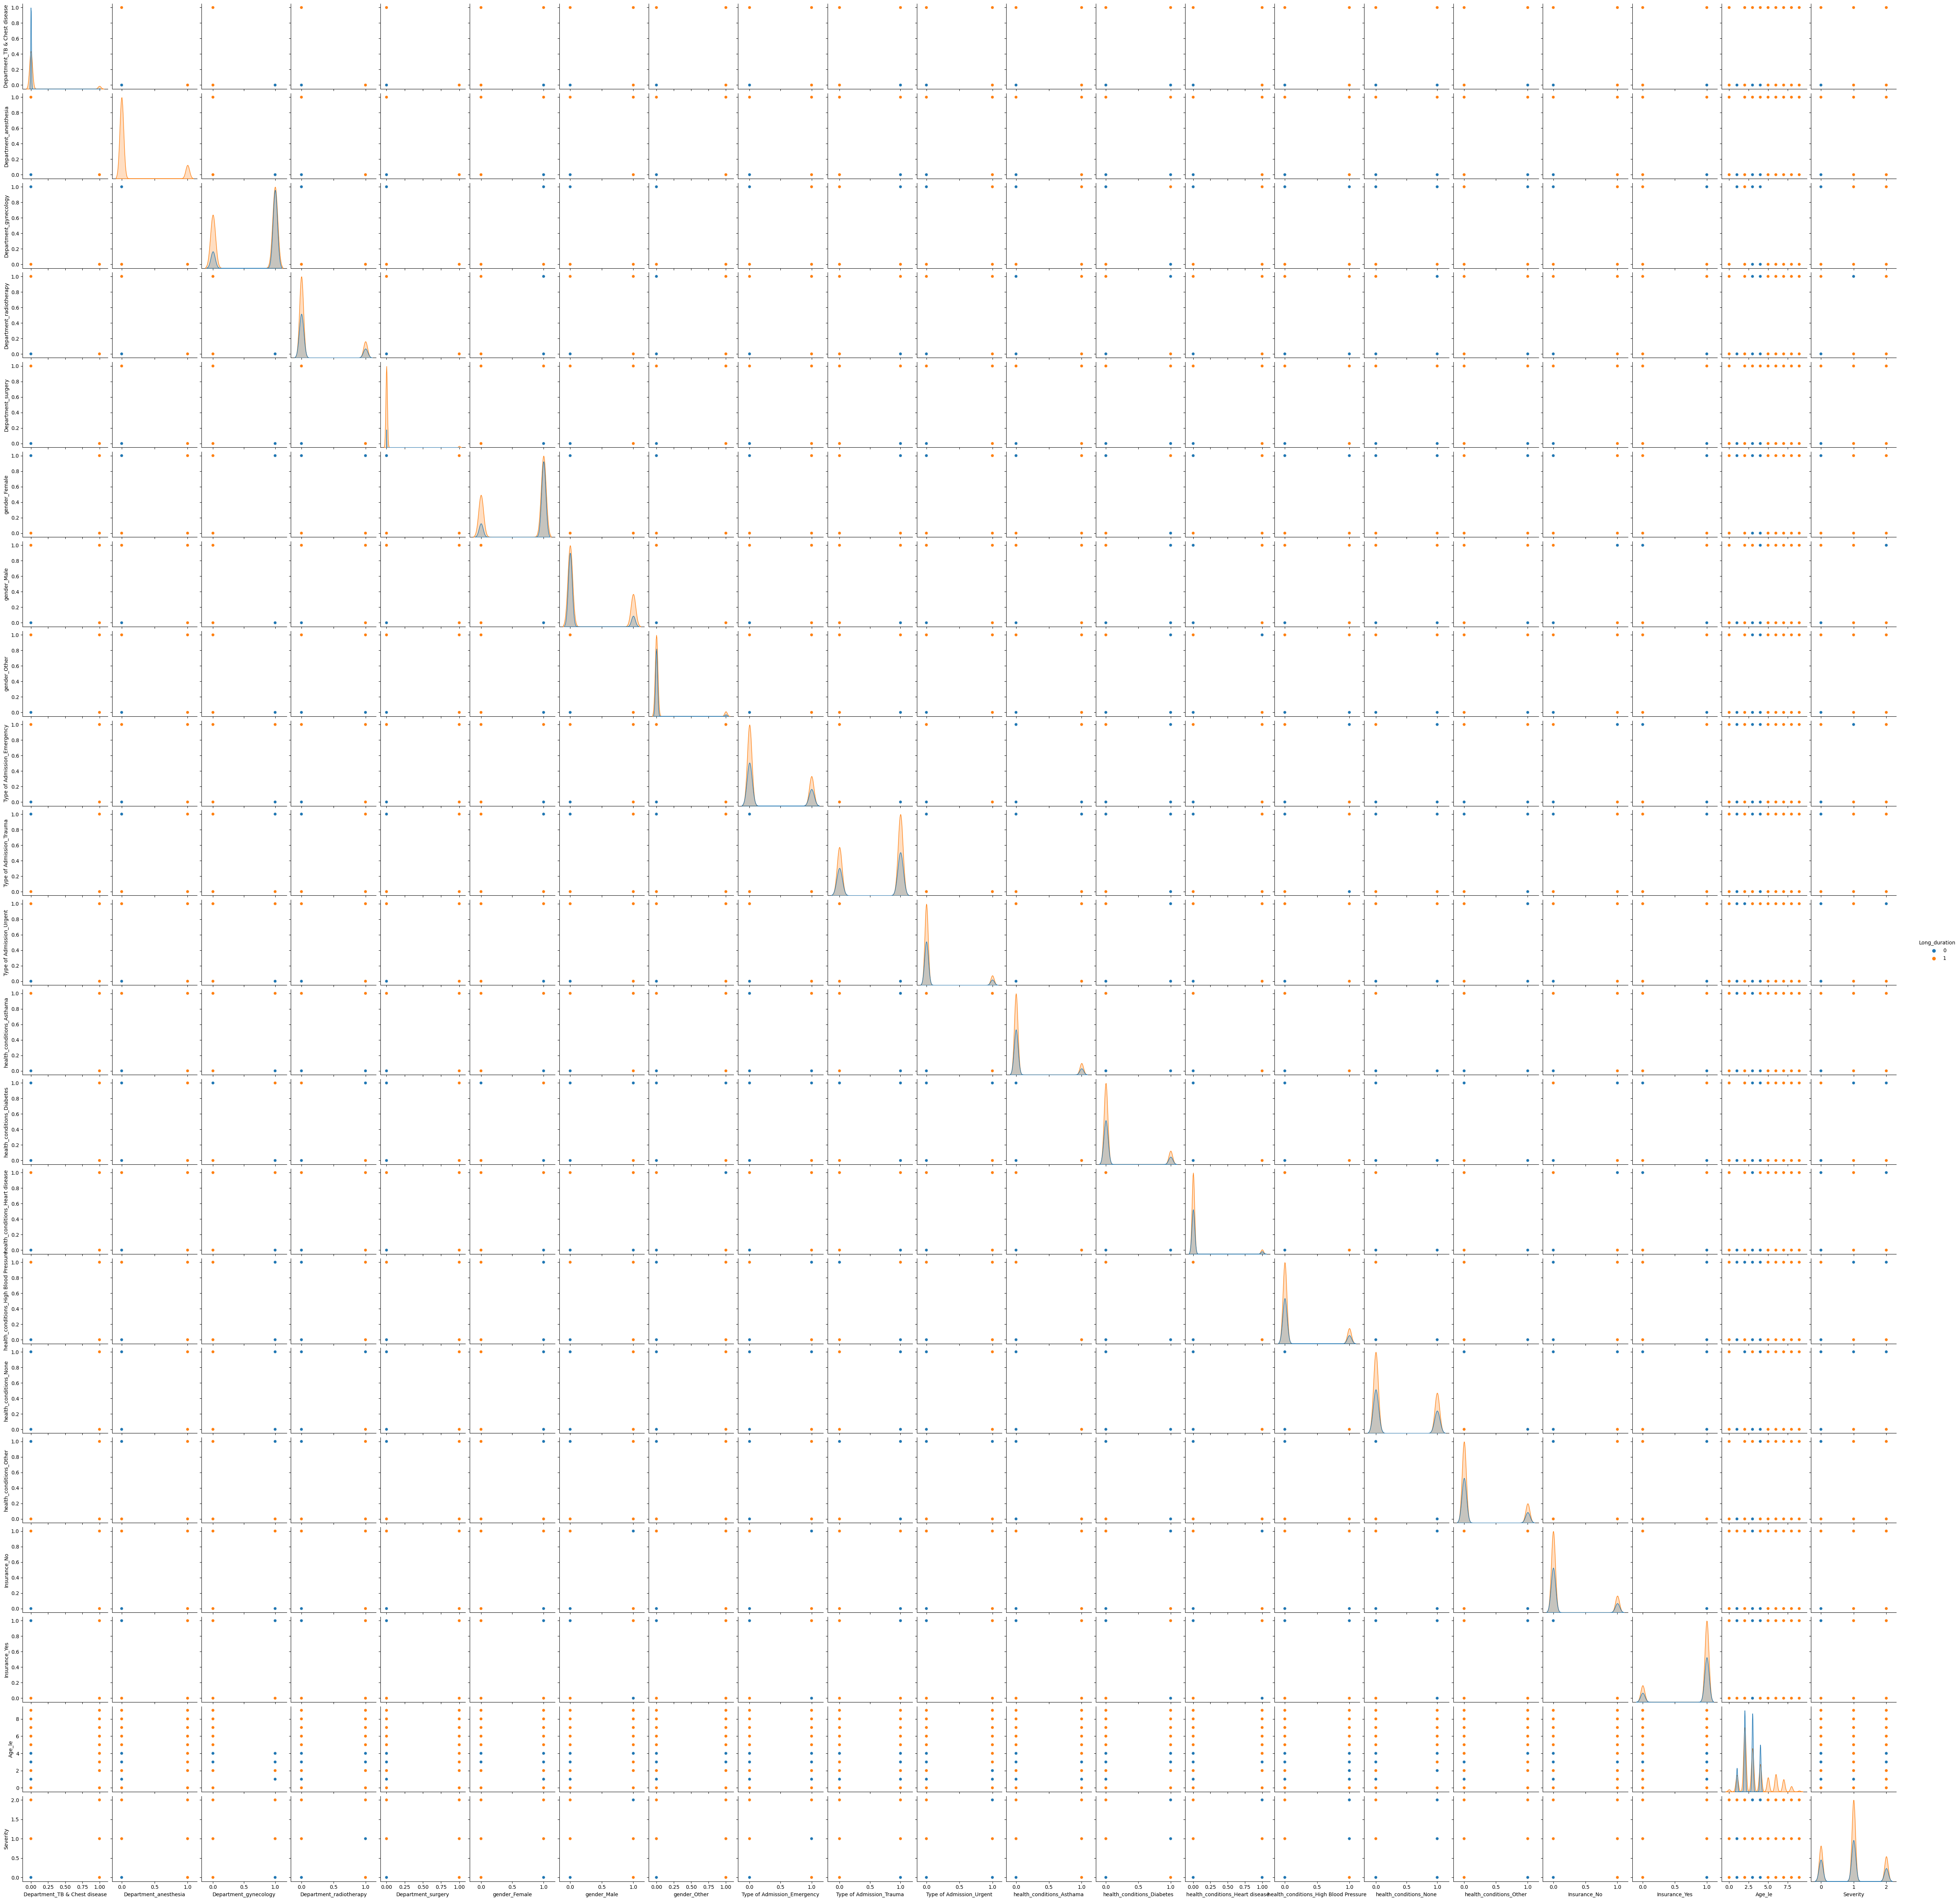

In [42]:
sns.pairplot(df_traindummis2, hue="Long_duration")
plt.show()

In [43]:
df_traindummis2.to_csv("df_train2")

In [51]:
df_traindummis2

,Long_duration,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_No,Insurance_Yes,Age_le,Severity
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,4,2
1,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,3,0
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,2
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,3,1
4,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,3,0
409996,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,2,2
409997,1,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,2,0
409998,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,2,1


## Transformación del DF de Test

In [44]:
df_TESTdummis = pd.get_dummies(df_test, columns= ['Department', 'doctor_name', 'gender', 'Type of Admission', 'health_conditions', 'Insurance'], drop_first=False)

In [45]:
le = preprocessing.LabelEncoder()
le.fit(df_TESTdummis['Age'])
df_TESTdummis['Age_le'] = le.transform( df_TESTdummis['Age'])

In [46]:
df_TESTdummis['Severity'] = df_TESTdummis['Severity of Illness'].map({'Extreme': 2, 'Moderate': 1, 'Minor':0})['Severity'] = df_TESTdummis['Severity of Illness'].map({'Extreme': 2, 'Moderate': 1, 'Minor':0})

In [47]:
df_TESTdummis =df_TESTdummis.drop(columns=['Available Extra Rooms in Hospital','Ward_Facility_Code' ])

In [48]:
df_TESTdummis = df_TESTdummis.drop(columns=['staff_available', 'Age', 'Severity of Illness','Visitors with Patient', 'Admission_Deposit' ])

In [49]:
df_TESTdummis= df_TESTdummis.drop(columns=['doctor_name_Dr Isaac','doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan','doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah','doctor_name_Dr Simon', 'doctor_name_Dr Sophia' ])

In [53]:
df_TESTdummis = df_TESTdummis.drop(columns=['patientid'])

In [55]:
df_TESTdummis.columns

Index(['Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'gender_Female', 'gender_Male', 'gender_Other',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_Diabetes', 'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [56]:
df_traindummis2.columns

Index(['Long_duration', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'gender_Female',
       'gender_Male', 'gender_Other', 'Type of Admission_Emergency',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'health_conditions_Asthama', 'health_conditions_Diabetes',
       'health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other', 'Insurance_No', 'Insurance_Yes', 'Age_le',
       'Severity'],
      dtype='object')

In [ ]:
df_TESTdummis.to_csv("df_test.csv")

# Se hacen un dataset con label encoder para reentrenar la red neuronal

Normalizamos los datos de train del dataset

In [16]:
duracion = (df_train["Stay (in days)"] >8)*1
df_train['Long_duration'] = duracion

In [20]:
df_train.drop(columns=['Ward_Facility_Code', 'patientid','Visitors with Patient', 'Admission_Deposit', 'Stay (in days)' ], inplace=True)

In [57]:
df_train.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Long_duration
0,4,gynecology,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,0
1,4,gynecology,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,1
2,2,gynecology,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,0
3,4,gynecology,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,0
4,2,anesthesia,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,1


In [63]:
df_train_LE = df_train.copy()

In [64]:
df_train_LE.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Long_duration
0,4,gynecology,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,0
1,4,gynecology,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,1
2,2,gynecology,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,0
3,4,gynecology,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,0
4,2,anesthesia,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,1


In [65]:
le = preprocessing.LabelEncoder()
le.fit(df_train_LE['Age'])
df_train_LE['Age_le'] = le.transform(df_train_LE['Age'])

In [66]:
le = preprocessing.LabelEncoder()
le.fit(df_train_LE['Department'])
df_train_LE['Department'] =le.transform(df_train_LE['Department'])

In [67]:
le.fit(df_train_LE['doctor_name'])
df_train_LE['doctor_name'] =le.transform(df_train_LE['doctor_name'])

In [68]:
le.fit(df_train_LE['gender'])
df_train_LE['gender'] =le.transform(df_train_LE['gender'])


In [69]:
le.fit(df_train_LE['Type of Admission'])
df_train_LE['Type of Admission'] =le.transform(df_train_LE['Type of Admission'])


In [70]:
le.fit(df_train_LE['Severity of Illness'])
df_train_LE['Severity of Illness'] =le.transform(df_train_LE['Severity of Illness'])


In [71]:
le.fit(df_train_LE['health_conditions'])
df_train_LE['health_conditions'] =le.transform(df_train_LE['health_conditions'])

In [72]:
le.fit(df_train_LE['Insurance'])
df_train_LE['Insurance'] =le.transform(df_train_LE['Insurance'])

In [74]:
df_train_LE.drop(columns='Age', inplace=True)

In [77]:
df_train_LE.head(-5)

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Long_duration,Age_le
0,4,2,8,0,0,1,0,1,1,0,4
1,4,2,8,2,0,1,1,2,0,1,3
2,2,2,8,8,0,1,0,1,1,0,2
3,4,2,4,7,0,2,2,4,0,0,3
4,2,1,2,10,1,1,2,1,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...
409990,2,2,8,7,0,1,2,2,1,1,4
409991,3,3,1,4,2,0,0,0,1,1,7
409992,4,2,4,4,0,1,2,4,1,0,2
409993,3,1,1,4,2,1,2,0,1,1,5


In [78]:
df_train_LE.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'doctor_name',
       'staff_available', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Insurance', 'Long_duration', 'Age_le'],
      dtype='object')

In [76]:
df_train_LE.to_csv("dfLabelEncoder.csv")

Normalizamos los datos de test del dataset

In [101]:
df_test_LE = df_test.copy()

In [102]:
df_test_LE.drop(columns=['Ward_Facility_Code', 'patientid','Visitors with Patient', 'Admission_Deposit'], inplace=True)

In [103]:
le = preprocessing.LabelEncoder()
le.fit(df_test_LE['Age'])
df_test_LE['Age_le'] = le.transform(df_test_LE['Age'])
le.fit(df_test_LE['doctor_name'])
df_test_LE['doctor_name'] =le.transform(df_test_LE['doctor_name'])
le.fit(df_test_LE['gender'])
df_test_LE['gender'] =le.transform(df_test_LE['gender'])
le.fit(df_test_LE['Type of Admission'])
df_test_LE['Type of Admission'] =le.transform(df_test_LE['Type of Admission'])
le.fit(df_test_LE['Severity of Illness'])
df_test_LE['Severity of Illness'] =le.transform(df_test_LE['Severity of Illness'])
le.fit(df_test_LE['health_conditions'])
df_test_LE['health_conditions'] =le.transform(df_test_LE['health_conditions'])
le.fit(df_test_LE['Insurance'])
df_test_LE['Insurance'] =le.transform(df_test_LE['Insurance'])
le.fit(df_test_LE['Department'])
df_test_LE['Department'] =le.transform(df_test_LE['Department'])


In [104]:
df_test_LE.drop(columns=['Age'], inplace=True)

In [105]:
df_test_LE.head()

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Age_le
0,3,2,4,10,0,1,2,5,0,2
1,2,0,1,4,0,1,2,0,1,5
2,2,3,1,7,2,1,2,4,0,5
3,2,2,4,1,0,1,2,4,1,2
4,2,1,1,7,0,1,0,1,0,5


In [106]:
df_test_LE.to_csv("dfTEST_LabelEncoder.csv", index= False)